In [14]:
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 
import seaborn as sns 

from sklearn.externals import joblib

%matplotlib inline

In [4]:
project_dir = os.path.abspath('../')
print('Set project directory: {}'.format(project_dir))

Set project directory: /Users/davidriser/repos/insight-airbnb


In [6]:
preds = pd.read_csv('{}/data/predictions/predictions.csv'.format(project_dir))
preds.head()

bedrooms  bathrooms   latitude  longitude  crime_index   price  \
0       2.0        2.0  42.326744 -71.098524     4.702597  599900   
1       3.0        1.5  42.381865 -71.018796     3.265707  445000   
2       2.0        1.0  42.366555 -71.051936     4.266133  749000   
3       2.0        1.0  42.384910 -71.016591     3.468682  465000   
4       2.0        1.0  42.380063 -71.030680     4.647857  474000   

   cluster_index  mbta_1  mbta_2  mbta_3       ...           dist_6  \
0              0   131.0   130.0   132.0       ...         0.882358   
1              1   109.0   144.0   110.0       ...         6.351385   
2              1   106.0   122.0    35.0       ...         4.453488   
3              1   109.0   110.0   144.0       ...         6.582423   
4              1   109.0   108.0   144.0       ...         5.857325   

      dist_7  dist_mbta_1  dist_mbta_2  dist_mbta_3  airbnb_log_price  \
0   9.494856     0.004297     0.005711     0.008685          5.439455   
1  11.838898     0.004720     0.011743     0.013085          5.302747   
2  11.080911     0.007284     0.008143     0.008143          5.490742   
3  12.038983     0.007950     0.010118     0.015172          5.274918   
4  11.784923     0.007323     0.008608     0.014168          5.281712   

   airbnb_price  monthly_payment       profit  profit_category  
0    230.316583      1929.515483  2977.667210        lucrative  
1    200.887948      1431.295866  2848.872985        lucrative  
2    242.436946      2409.080008  2756.342178        lucrative  
3    195.374492      1495.623770  2667.074009        lucrative  
4    196.706291      1524.571327  2666.502084        lucrative  

[5 rows x 27 columns]

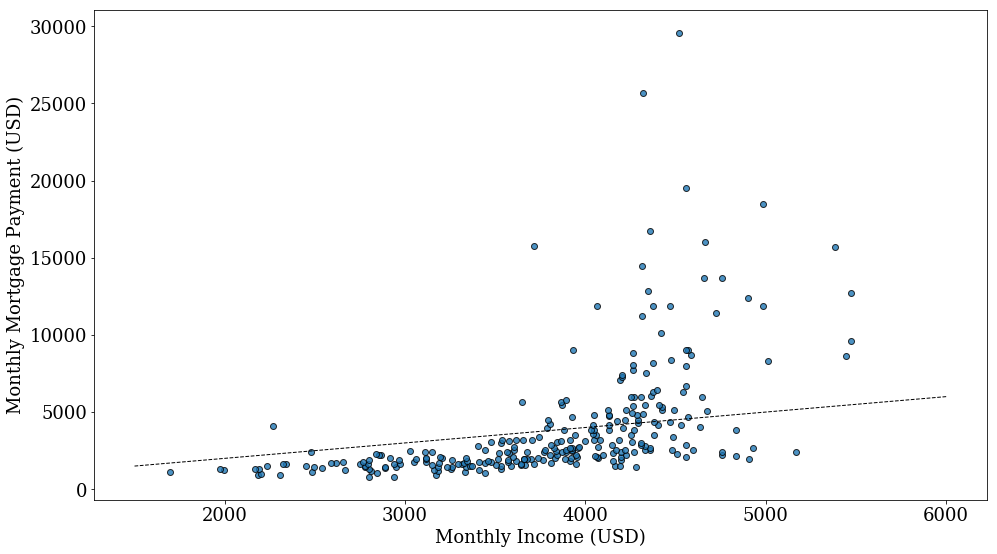

In [23]:
plt.figure(figsize = (16, 9))
plt.rc('font', size = 18)
plt.rc('font', family = 'serif')
plt.scatter(
    preds['airbnb_price'] * (365.25) / 12.0 * 0.7,
    preds['monthly_payment'],
    edgecolor = 'k',
    alpha = 0.8
)
plt.xlabel('Monthly Income (USD)')
plt.ylabel('Monthly Mortgage Payment (USD)')

# Break even line 
plt.plot(
    np.linspace(1500, 6000, 100),
    np.linspace(1500, 6000, 100),
    linestyle = '--',
    linewidth = 1.0,
    color = 'k'
)

plt.savefig('{}/image/income_mortgage_scatter.png'.format(project_dir), bbox_inches = 'tight')

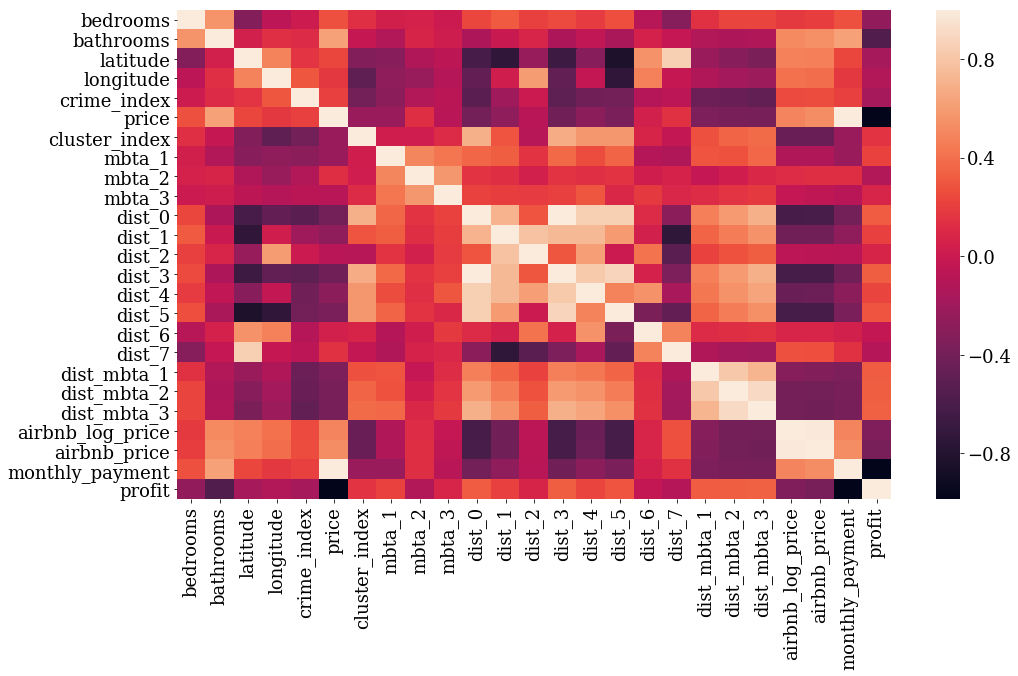

In [27]:
plt.figure(figsize = (16, 9))
sns.heatmap(preds.corr())

In [28]:
preds.corr()['profit']

bedrooms           -0.257688
bathrooms          -0.574267
latitude           -0.165628
longitude          -0.112812
crime_index        -0.169608
price              -0.986155
cluster_index       0.150414
mbta_1              0.219276
mbta_2             -0.116893
mbta_3              0.076847
dist_0              0.321511
dist_1              0.209481
dist_2              0.071735
dist_3              0.331451
dist_4              0.229256
dist_5              0.286575
dist_6             -0.038564
dist_7             -0.103841
dist_mbta_1         0.318923
dist_mbta_2         0.331092
dist_mbta_3         0.337393
airbnb_log_price   -0.343389
airbnb_price       -0.379766
monthly_payment    -0.986155
profit              1.000000
Name: profit, dtype: float64

In [30]:
preds.groupby(['bedrooms', 'bathrooms']).agg({'profit' : [np.mean, np.std], 'airbnb_price' : [np.mean, np.std]})

profit              airbnb_price           
                           mean          std         mean        std
bedrooms bathrooms                                                  
0.0      1.0        1494.695015   365.028734   141.475911  27.755251
1.0      1.0        1284.721609   581.677776   154.710260  27.372900
         1.5       -1540.803630  5352.146800   188.363817  14.800802
         2.0        -271.908668  1476.419269   191.853791  27.735562
2.0      1.0        1386.940340   842.648584   164.067562  25.228585
         1.5         743.171472  1023.827096   176.268066  28.822618
         2.0         741.407590  1736.632373   192.272115  20.116364
         2.5       -2328.084159  3177.348921   207.423866  19.357889
         3.0         442.279337          NaN   167.944367        NaN
3.0      1.0        1475.946344   494.452739   135.022777  26.299219
         1.5        1256.028123   634.646067   139.323041  29.136962
         2.0        1092.677944   933.859311   183.667263  28.815780
         2.5       -1786.632105  4432.784828   185.048844  39.727319
         3.0       -4803.631144  4238.732759   202.823240  25.398756
         3.5       -8908.211541  8151.936204   201.339218  24.415318
         4.5       -8911.501921          NaN   223.323095        NaN